<a href="https://colab.research.google.com/github/FairozAhmadSheikh/Tensor_Flow/blob/main/second_project_for_digit_classification_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [48]:
import matplotlib.pyplot as plt

In [49]:
(train_data,train_label),(test_data,test_label)=mnist.load_data()

In [50]:
train_data.shape,test_data.shape

((60000, 28, 28), (10000, 28, 28))

In [51]:
train_label.shape,test_label.shape

((60000,), (10000,))

In [52]:
train_data[0],train_label[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
           0

In [53]:
import random
def display_random_images():
    index_random_1=random.randint(0,len(train_data))
    index_random_2=random.randint(0,len(train_data))
    index_random_3=random.randint(0,len(train_data))
    index_random_4=random.randint(0,len(train_data))
    listed=[index_random_1,index_random_2,index_random_3,index_random_4]
    plt.figure(figsize=(10,9))
    for i in range(len(listed)):
      plt.subplot(1,4,i+1)
      plt.imshow(train_data[listed[i]])
      plt.title(train_label[listed[i]])
      plt.axis('off')

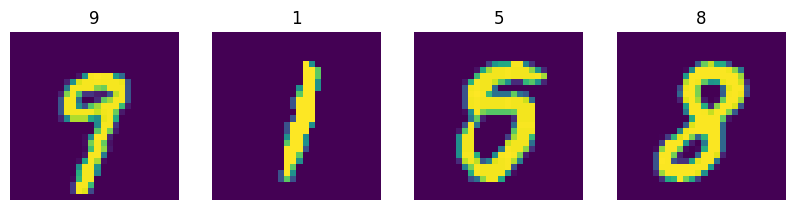

In [54]:
display_random_images()

In [55]:
multi_class_model=tf.keras.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax'),
])
multi_class_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['accuracy'])

In [56]:
non_norm_history=multi_class_model.fit(train_data,train_label,epochs=10,validation_data=(test_data,test_label))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.1692 - loss: 2.9226 - val_accuracy: 0.2108 - val_loss: 2.0020
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2120 - loss: 2.0009 - val_accuracy: 0.2227 - val_loss: 1.9728
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2345 - loss: 1.9547 - val_accuracy: 0.3038 - val_loss: 1.7554
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3511 - loss: 1.6359 - val_accuracy: 0.4582 - val_loss: 1.3642
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4605 - loss: 1.3336 - val_accuracy: 0.4931 - val_loss: 1.2517
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5148 - loss: 1.2231 - val_accuracy: 0.5516 - val_loss: 1.1633
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5379 - loss: 1.1459 - val_accuracy: 0.5516 - val_loss: 1.1108
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5639 - loss: 1.1040 -

In [57]:
# Lets try normalizing data so that model might imporve
train_data.min(),train_data.max()

(np.uint8(0), np.uint8(255))

In [58]:
test_data.min(),test_data.max()

(np.uint8(0), np.uint8(255))

In [59]:
train_data_norm=train_data/255.0
test_data_norm=test_data/255.0

In [60]:
# Refit same model but on noramlized data
multi_class_model_norm=tf.keras.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax'),
])
multi_class_model_norm.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['accuracy'])

In [61]:
train_data.shape,test_label.shape

((60000, 28, 28), (10000,))

In [62]:
norm_history=multi_class_model_norm.fit(train_data_norm,train_label,epochs=10,validation_data=(test_data_norm,test_label))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5883 - loss: 1.2289 - val_accuracy: 0.8752 - val_loss: 0.4186
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8818 - loss: 0.4108 - val_accuracy: 0.8902 - val_loss: 0.3757
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8932 - loss: 0.3724 - val_accuracy: 0.8993 - val_loss: 0.3455
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8995 - loss: 0.3472 - val_accuracy: 0.9026 - val_loss: 0.3406
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9021 - loss: 0.3381 - val_accuracy: 0.9053 - val_loss: 0.3262
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9082 - loss: 0.3217 - val_accuracy: 0.9073 - val_loss: 0.3221
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9101 - loss: 0.3195 - val_accuracy: 0.9085 - val_loss: 0.3228
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9132 - loss: 0.3060 

In [63]:
import pandas as pd

<Axes: title={'center': 'Non Normalized Data'}>

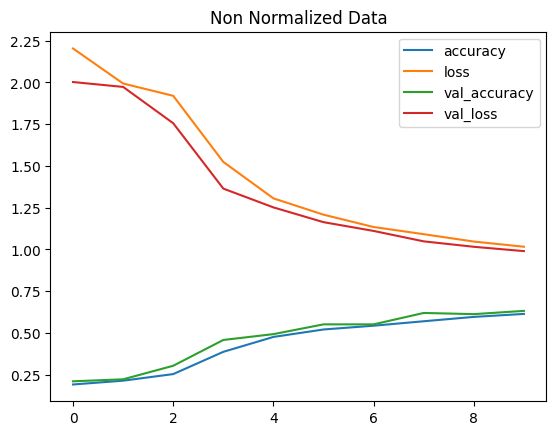

In [66]:
pd.DataFrame(non_norm_history.history).plot(title=("Non Normalized Data"))

<Axes: title={'center': 'Normalized Data'}>

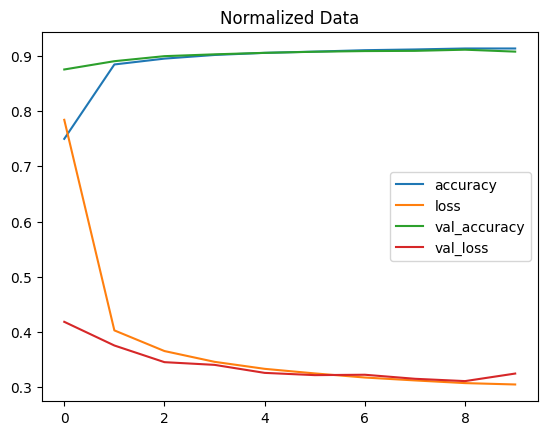

In [67]:
pd.DataFrame(norm_history.history).plot(title=("Normalized Data"))

**Lets find Ideal Learning Rate using a callback function**

In [68]:
learning_rate_schedular=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))
multi_class_model_norm.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['accuracy'])
find_lr_history=multi_class_model_norm.fit(train_data,train_label,validation_data=(test_data,test_label),
                                            epochs=100,callbacks=[learning_rate_schedular])

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9055 - loss: 45.7612 - val_accuracy: 0.9084 - val_loss: 41.9713 - learning_rate: 1.0000e-04
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9161 - loss: 36.6942 - val_accuracy: 0.9058 - val_loss: 36.4275 - learning_rate: 1.1220e-04
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9145 - loss: 30.8926 - val_accuracy: 0.9041 - val_loss: 32.9634 - learning_rate: 1.2589e-04
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9142 - loss: 27.5629 - val_accuracy: 0.9038 - val_loss: 29.6488 - learning_rate: 1.4125e-04
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9120 - loss: 24.4514 - val_accuracy: 0.9016 - val_loss: 26.4653 - learning_rate: 1.5849e-04
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9111 - loss: 21.4051 - val_accuracy: 0.9012 - val_loss: 23.3992 - learning_rate: 1.7783e-04
Epoch 7/100
1875/1875 ━━━━━━━━━━━━

Text(0, 0.5, 'Loss')

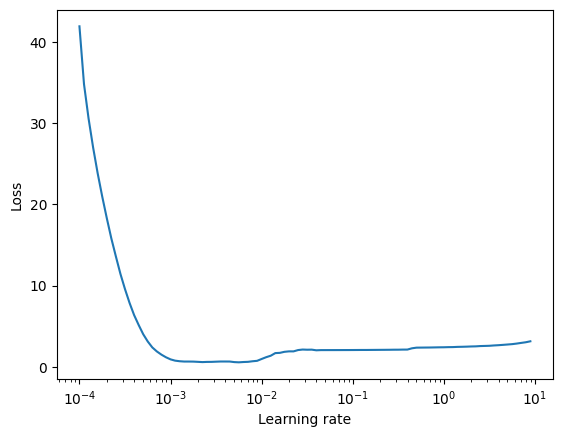

In [70]:
lrs=1e-4*10**(tf.range(100)/20)
plt.semilogx(lrs,find_lr_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')

In [71]:
10**-3   # This is almost our ideal learning rate and is default lr for adam optimizer

0.001

Recreate and comiple model using ideal learning rate now

In [73]:
# Refit same model but on noramlized data
final_model=tf.keras.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax'),
])
final_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                          optimizer=tf.keras.optimizers.Adam(0.001),
                          metrics=['accuracy'])
final_history=final_model.fit(train_data_norm,train_label,epochs=10,validation_data=(test_data_norm,test_label))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5733 - loss: 1.2340 - val_accuracy: 0.8763 - val_loss: 0.4141
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8791 - loss: 0.4113 - val_accuracy: 0.8874 - val_loss: 0.3718
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8936 - loss: 0.3676 - val_accuracy: 0.8937 - val_loss: 0.3636
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8977 - loss: 0.3451 - val_accuracy: 0.8932 - val_loss: 0.3640
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9013 - loss: 0.3426 - val_accuracy: 0.8981 - val_loss: 0.3468
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9021 - loss: 0.3352 - val_accuracy: 0.9000 - val_loss: 0.3392
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9055 - loss: 0.3284 - val_accuracy: 0.9027 - val_loss: 0.3364
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9085 - loss: 0.3141 - 

Lets Now Evaluate  our model



In [74]:
final_preds=final_model.predict(test_data_norm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [72]:
from sklearn.metrics import confusion_matrix

In [85]:
cm=confusion_matrix(test_label,final_preds.argmax(axis=1))
cm

array([[ 956,    0,    2,    1,    2,    7,    5,    3,    4,    0],
       [   0, 1089,    9,    8,    2,    1,    5,    1,   20,    0],
       [  14,    3,  917,   29,   11,    2,   13,   14,   25,    4],
       [   3,    1,   22,  859,    2,   57,    1,   20,   33,   12],
       [   3,    1,    6,    0,  887,    0,   11,    5,    4,   65],
       [  10,    3,    1,   48,   18,  750,   19,    1,   25,   17],
       [  18,    2,    5,    0,   10,   21,  892,    1,    9,    0],
       [   4,    6,   24,    5,    4,    1,    0,  949,    0,   35],
       [   9,    2,   14,   19,   20,   27,    7,    4,  836,   36],
       [   9,    2,    1,    7,   36,    6,    0,   15,   10,  923]])

In [97]:
import seaborn as sns

In [100]:
# Lets make it more beutiful now
def plot_confusion_matrix(cm):
    classes=[i  for i in range(11)]
    sns.heatmap(cm,annot=True,fmt='d',xticklabels=classes,yticklabels=classes,linewidths=1,linecolor='black')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')


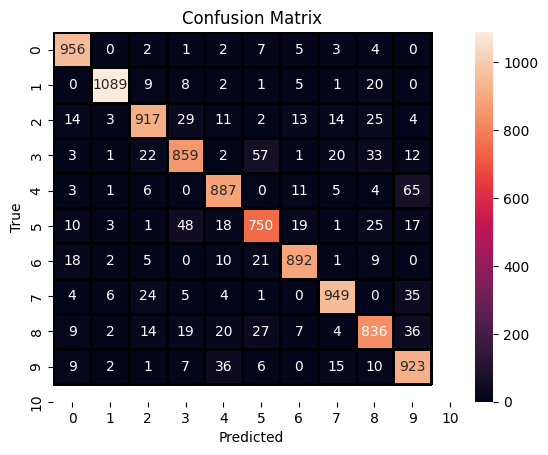

In [101]:
plot_confusion_matrix(cm)

**Lets Visualize INPUTS and OUTPUTS**
*  plot a random image
*  make a prediction on it
*  label the plot with true and predicted label

In [103]:
classes=[i for i in range(11)]
classes

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [124]:
import random
def plot_random_image(model,images,true_labels):
    i=random.randint(0,len(images))
    target_image=images[i]
    pred_prob=model.predict(target_image.reshape(1,28,28))
    pred_label=pred_prob.argmax()
    true_label=true_labels[i]

    plt.imshow(target_image)
    if pred_label==true_label:
        color='green'
    else:
        color='red'
    plt.title('{} :  is predicted value {:.2f}%  (True {})'.format(pred_label,pred_prob[0][pred_label]*100,true_label),color=color)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


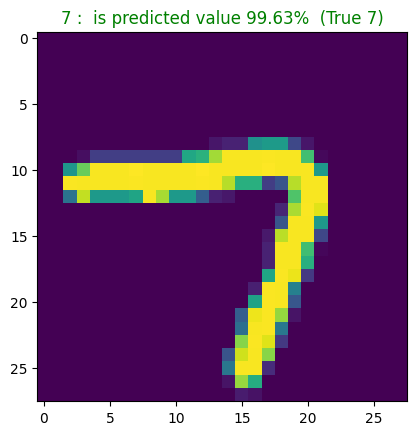

In [125]:
plot_random_image(model=final_model,images=test_data_norm,true_labels=test_label)